# PREDICT THE CRIMINALS

In [20]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import f1_score
from IPython.display import FileLink
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TrainDataPath = './Criminal/criminal_train.csv'
TestDataPath = './Criminal/criminal_test.csv'

# Loading the Training and Test Dataset
TrainData = pd.read_csv(TrainDataPath)
TestData = pd.read_csv(TestDataPath)

# Exploring The Dataset

In [3]:
print("Training Dataset Shape:")
print(TrainData.shape)
print("\n")
print("Training Dataset:")
TrainData.head()

Training Dataset Shape:
(45718, 72)


Training Dataset:


,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [4]:
print("Test Dataset Shape:")
print(TestData.shape)
print("\n")
print("Test Dataset:")
TestData.head()

Test Dataset Shape:
(11430, 71)


Test Dataset:


,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


In [5]:
# Now Checking For Any Missing Values
print("Training Dataset Missing Value Columns:")
print(TrainData.isnull().sum())
print("\n")
print("Test Dataset Missing Value Columns:")
print(TestData.isnull().sum())

Training Dataset Missing Value Columns:
PERID        0
IFATHER      0
NRCH17_2     0
IRHHSIZ2     0
IIHHSIZ2     0
IRKI17_2     0
IIKI17_2     0
IRHH65_2     0
IIHH65_2     0
PRXRETRY     0
PRXYDATA     0
MEDICARE     0
CAIDCHIP     0
CHAMPUS      0
PRVHLTIN     0
GRPHLTIN     0
HLTINNOS     0
HLCNOTYR     0
HLCNOTMO     0
HLCLAST      0
HLLOSRSN     0
HLNVCOST     0
HLNVOFFR     0
HLNVREF      0
HLNVNEED     0
HLNVSOR      0
IRMCDCHP     0
IIMCDCHP     0
IRMEDICR     0
IIMEDICR     0
            ..
CELLNOTCL    0
CELLWRKNG    0
IRFAMSOC     0
IIFAMSOC     0
IRFAMSSI     0
IIFAMSSI     0
IRFSTAMP     0
IIFSTAMP     0
IRFAMPMT     0
IIFAMPMT     0
IRFAMSVC     0
IIFAMSVC     0
IRWELMOS     0
IIWELMOS     0
IRPINC3      0
IRFAMIN3     0
IIPINC3      0
IIFAMIN3     0
GOVTPROG     0
POVERTY3     0
TOOLONG      0
TROUBUND     0
PDEN10       0
COUTYP2      0
MAIIN102     0
AIIND102     0
ANALWT_C     0
VESTR        0
VEREP        0
Criminal     0
Length: 72, dtype: int64


Test Dataset Missi

**I find their is no missing value in both the train/test set**

# Now Preparing Our Model - XGBoost

In [13]:
pd.set_option('display.max_columns', 1000)

In [14]:
Y = TrainData['Criminal']
X = TrainData.drop('Criminal', axis = 1)
X = X.drop('PERID', axis =1)

In [15]:
X.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.805998,40026,1
1,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.108106,40015,2
2,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.957980,40024,1
3,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.521931,40027,1
4,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.118526,40001,2


In [19]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
IFATHER,45718.0,3.355549,1.176651,-1.0,4.000000,4.00000,4.000000,4.000
NRCH17_2,45718.0,0.476486,0.888472,-1.0,0.000000,0.00000,1.000000,3.000
IRHHSIZ2,45718.0,3.426375,1.427420,-1.0,2.000000,3.00000,4.000000,6.000
IIHHSIZ2,45718.0,1.001706,0.061314,-1.0,1.000000,1.00000,1.000000,3.000
IRKI17_2,45718.0,2.084124,1.102988,-1.0,1.000000,2.00000,3.000000,4.000
IIKI17_2,45718.0,1.007437,0.123162,-1.0,1.000000,1.00000,1.000000,3.000
IRHH65_2,45718.0,1.162606,0.469029,-1.0,1.000000,1.00000,1.000000,3.000
IIHH65_2,45718.0,1.011024,0.146444,-1.0,1.000000,1.00000,1.000000,3.000
PRXRETRY,45718.0,97.394943,12.355156,-1.0,99.000000,99.00000,99.000000,99.000
PRXYDATA,45718.0,70.874098,44.325675,-1.0,1.000000,99.00000,99.000000,99.000


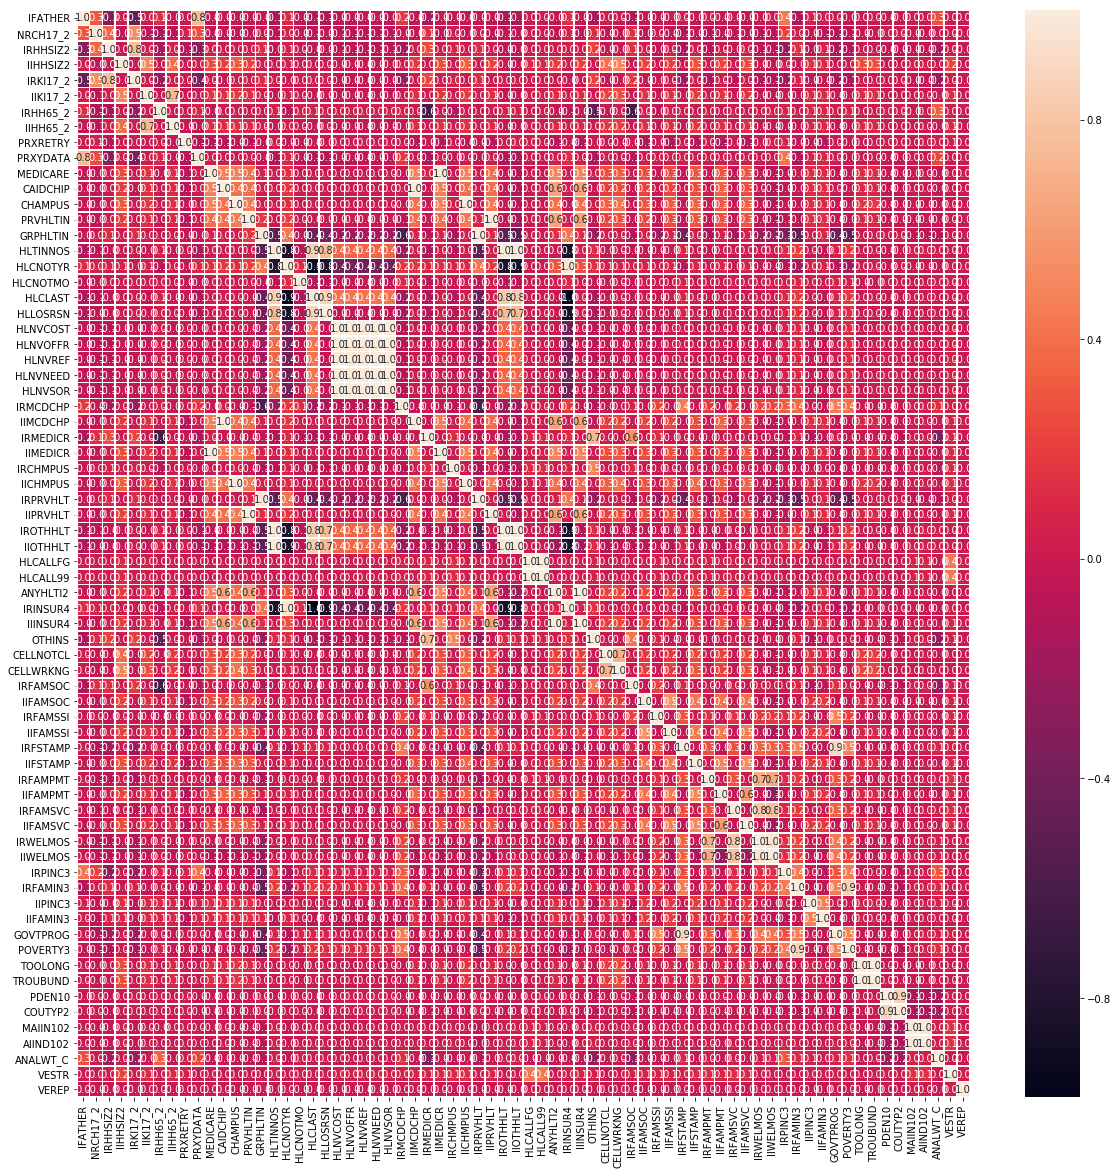

In [24]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [25]:
X_train = X.drop({'IIMCDCHP','IIMEDICR','IICHMPUS','IRPRVHLT','IIPRVHLT','IROTHHLT','IIOTHHLT','IRINSUR4','AIIND102'}, axis=1)
X_train = X_train.drop({'HLNVOFFR','HLNVREF','HLNVNEED','HLNVSOR','HLCALL99','IIINSUR4','IIWELMOS','TROUBUND'}, axis=1)
Y_train = Y.copy()

In [133]:
y_train = Y_train[X_train['VESTR'] > 0]
x_train = X_train[X_train['VESTR'] > 0]

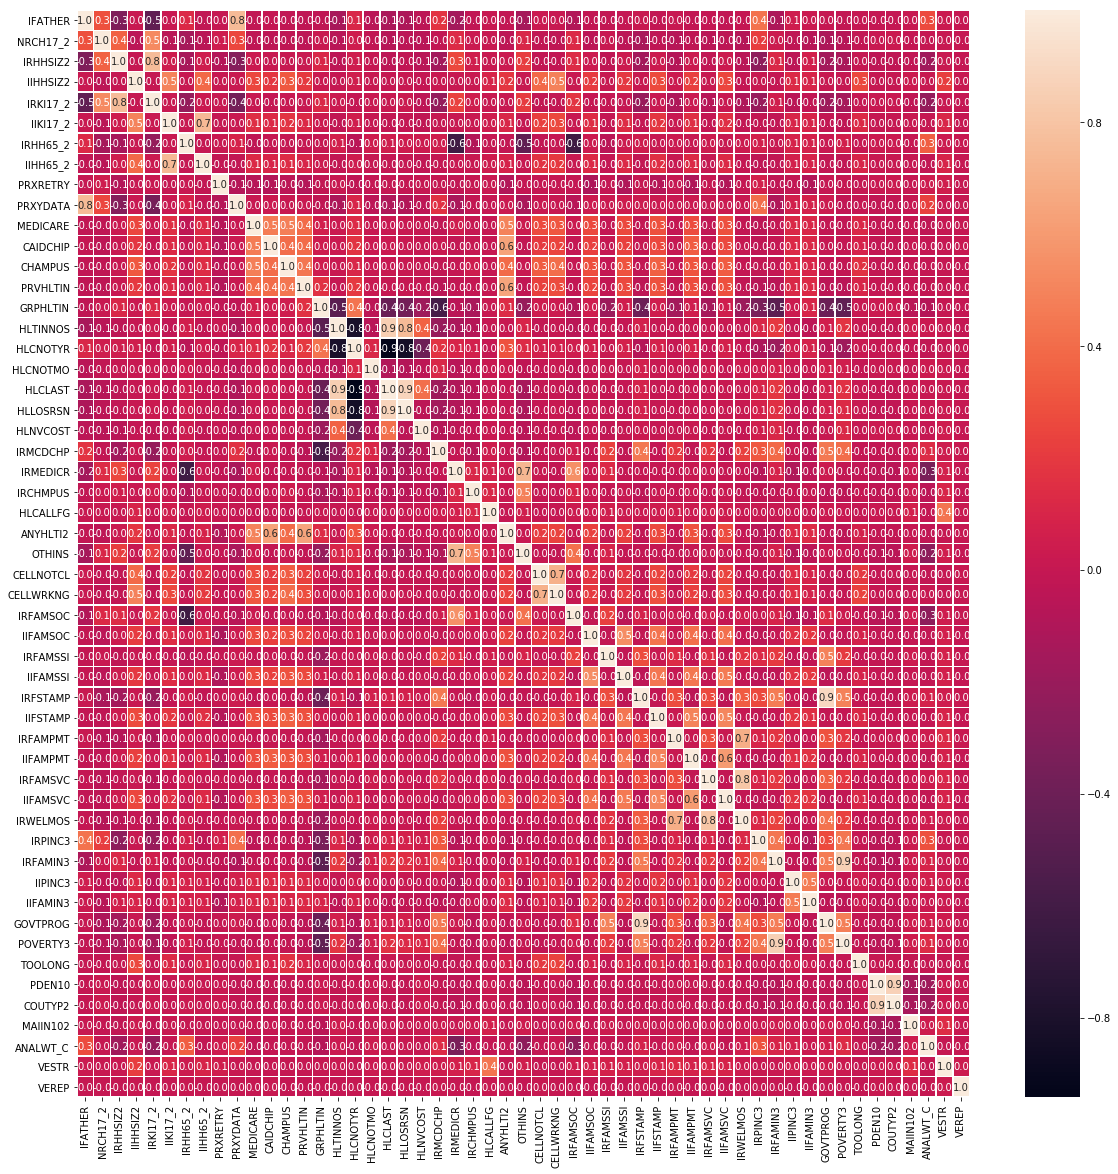

In [26]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [18]:
PERID = TestData['PERID']
TestData = TestData.drop('PERID', axis = 1)

In [134]:
xg_clf = xgb.XGBClassifier(n_estimators=42, max_depth=4, seed=1729) #lb 0.95241

In [135]:
xg_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=42, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1729, silent=True, subsample=1)

In [136]:
pred = xg_clf.predict(X_train)
f1_score(pred,Y_train)

0.62017699115044245

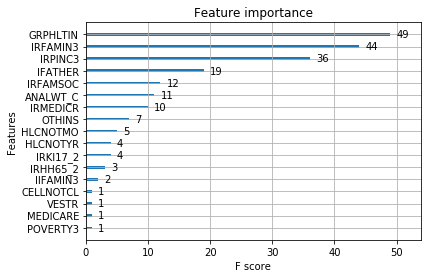

In [137]:
xgb.plot_importance(xg_clf)

In [31]:
X_test = TestData.drop({'IIMCDCHP','IIMEDICR','IICHMPUS','IRPRVHLT','IIPRVHLT','IROTHHLT','IIOTHHLT','IRINSUR4','AIIND102'}, axis=1)
X_test = X_test.drop({'HLNVOFFR','HLNVREF','HLNVNEED','HLNVSOR','HLCALL99','IIINSUR4','IIWELMOS','TROUBUND'}, axis=1)

In [140]:
predictions = xg_clf.predict(X_test)

In [141]:
sub = pd.DataFrame({'PERID': PERID, 'Criminal': predictions})
filename = 'submissison.csv'
sub.to_csv(filename, index=False, columns=['PERID', 'Criminal'])
FileLink(filename)

/home/sparsh/Desktop/Challenges/HACKEREARTH/Predict the Criminals/submissison.csv

# Visualization

In [95]:
X_train.dtypes

IFATHER        int64
NRCH17_2       int64
IRHHSIZ2       int64
IIHHSIZ2       int64
IRKI17_2       int64
IIKI17_2       int64
IRHH65_2       int64
IIHH65_2       int64
PRXRETRY       int64
PRXYDATA       int64
MEDICARE       int64
CAIDCHIP       int64
CHAMPUS        int64
PRVHLTIN       int64
GRPHLTIN       int64
HLTINNOS       int64
HLCNOTYR       int64
HLCNOTMO       int64
HLCLAST        int64
HLLOSRSN       int64
HLNVCOST       int64
IRMCDCHP       int64
IRMEDICR       int64
IRCHMPUS       int64
HLCALLFG       int64
ANYHLTI2       int64
OTHINS         int64
CELLNOTCL      int64
CELLWRKNG      int64
IRFAMSOC       int64
IIFAMSOC       int64
IRFAMSSI       int64
IIFAMSSI       int64
IRFSTAMP       int64
IIFSTAMP       int64
IRFAMPMT       int64
IIFAMPMT       int64
IRFAMSVC       int64
IIFAMSVC       int64
IRWELMOS       int64
IRPINC3        int64
IRFAMIN3       int64
IIPINC3        int64
IIFAMIN3       int64
GOVTPROG       int64
POVERTY3       int64
TOOLONG        int64
PDEN10       

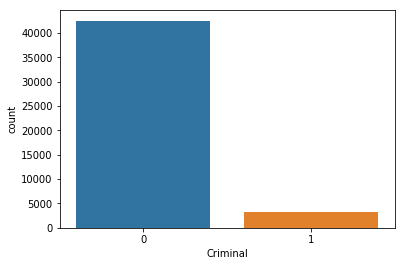

In [85]:
sns.countplot(Y_train) #Skewed Dataset

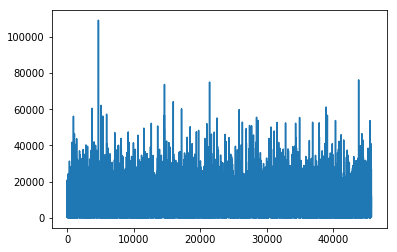

In [123]:
plt.plot((X_train['ANALWT_C']))
plt.show()

In [124]:
X_train[X_train['ANALWT_C'] < 0]

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,IRMCDCHP,IRMEDICR,IRCHMPUS,HLCALLFG,ANYHLTI2,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,PDEN10,COUTYP2,MAIIN102,ANALWT_C,VESTR,VEREP
19230,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1
44281,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1


In [125]:
Y_train[X_train['ANALWT_C'] < 0]

19230    0
44281    0
Name: Criminal, dtype: int64

In [127]:
X_train[Y_train == 1]

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,IRMCDCHP,IRMEDICR,IRCHMPUS,HLCALLFG,ANYHLTI2,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,PDEN10,COUTYP2,MAIIN102,ANALWT_C,VESTR,VEREP
1,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,2,2,2,98,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,1,1,1,1,1,1,2,2,3,2,1627.108106,40015,2
37,4,0,1,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,2,2,2,98,1,2,2,1,2,1,2,1,2,1,2,1,2,1,99,2,2,1,1,2,2,2,1,1,2,383.530899,40007,1
42,4,0,2,1,1,1,2,1,99,99,1,2,2,1,1,99,2,99,99,99,99,2,1,2,98,1,1,2,1,1,1,2,1,2,1,2,1,2,1,99,5,5,1,1,2,3,1,2,3,2,3061.597032,40003,1
43,4,0,2,1,1,1,3,1,99,99,1,2,2,1,1,99,2,99,99,99,99,2,1,2,98,1,1,1,1,1,1,1,1,2,1,2,1,2,1,99,2,3,1,1,1,2,2,2,2,2,3492.660971,40048,2
61,4,0,2,1,1,1,3,1,99,99,1,2,2,1,2,99,2,99,99,99,99,2,1,2,98,1,1,2,1,1,1,2,1,2,1,2,1,2,1,99,2,3,1,1,2,2,2,2,2,2,10067.000170,40025,2
101,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,2,2,2,98,1,2,2,1,2,1,2,1,2,1,2,1,2,1,99,2,2,1,1,2,2,2,2,2,2,3603.628287,40027,1
128,2,0,4,1,4,1,1,1,99,1,2,2,2,1,1,99,2,99,99,99,99,2,2,2,98,1,2,2,1,2,1,2,1,1,1,2,1,2,1,99,1,3,1,1,1,2,2,2,3,2,920.229299,40023,1
178,4,0,1,1,1,1,2,1,99,99,1,2,2,1,1,99,2,99,99,99,99,2,1,2,98,1,1,2,1,1,1,2,1,2,1,2,1,2,1,99,2,2,1,1,2,2,2,2,3,2,3393.778618,40023,2
184,2,0,6,1,4,1,1,1,2,99,2,2,94,94,98,99,98,98,98,98,98,2,2,2,98,94,2,2,1,2,1,2,1,2,1,2,1,2,1,99,1,4,1,1,2,2,2,2,2,2,461.568012,40024,1
187,1,0,4,1,2,1,2,1,99,99,2,2,2,1,1,99,2,99,99,99,99,2,2,2,98,1,2,1,1,1,1,2,1,2,1,2,1,2,1,99,1,5,1,1,2,2,2,3,3,1,1503.192812,40002,2


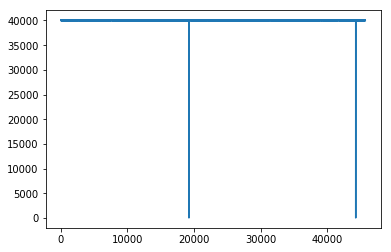

In [128]:
plt.plot((X_train['VESTR']))
plt.show()

In [132]:
X_train[X_train['VESTR'] > 0].count()

IFATHER      45716
NRCH17_2     45716
IRHHSIZ2     45716
IIHHSIZ2     45716
IRKI17_2     45716
IIKI17_2     45716
IRHH65_2     45716
IIHH65_2     45716
PRXRETRY     45716
PRXYDATA     45716
MEDICARE     45716
CAIDCHIP     45716
CHAMPUS      45716
PRVHLTIN     45716
GRPHLTIN     45716
HLTINNOS     45716
HLCNOTYR     45716
HLCNOTMO     45716
HLCLAST      45716
HLLOSRSN     45716
HLNVCOST     45716
IRMCDCHP     45716
IRMEDICR     45716
IRCHMPUS     45716
HLCALLFG     45716
ANYHLTI2     45716
OTHINS       45716
CELLNOTCL    45716
CELLWRKNG    45716
IRFAMSOC     45716
IIFAMSOC     45716
IRFAMSSI     45716
IIFAMSSI     45716
IRFSTAMP     45716
IIFSTAMP     45716
IRFAMPMT     45716
IIFAMPMT     45716
IRFAMSVC     45716
IIFAMSVC     45716
IRWELMOS     45716
IRPINC3      45716
IRFAMIN3     45716
IIPINC3      45716
IIFAMIN3     45716
GOVTPROG     45716
POVERTY3     45716
TOOLONG      45716
PDEN10       45716
COUTYP2      45716
MAIIN102     45716
ANALWT_C     45716
VESTR        45716
VEREP       